# Working with sqlite databases in Jupyter for European Soccer Match Data 

This post includes code and notes from [data-analysis-using-sql](https://www.kaggle.com/dimarudov/data-analysis-using-sql).

In [35]:
import sqlalchemy as db
import sqlite3
import pandas as pd
import numpy as np

In [36]:
engine = db.create_engine('sqlite:///database.sqlite')
connection = engine.connect()
metadata = db.MetaData()

In [37]:
connection

In [38]:
engine.execute("SELECT * FROM Country LIMIT 10").fetchall()

[(1, 'Belgium'),
 (1729, 'England'),
 (4769, 'France'),
 (7809, 'Germany'),
 (10257, 'Italy'),
 (13274, 'Netherlands'),
 (15722, 'Poland'),
 (17642, 'Portugal'),
 (19694, 'Scotland'),
 (21518, 'Spain')]

In [39]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [40]:
%sql sqlite:///database.sqlite

In [41]:
%%sql
SELECT *
FROM Country
LIMIT 10

 * sqlite:///database.sqlite
Done.


id,name
1,Belgium
1729,England
4769,France
7809,Germany
10257,Italy
13274,Netherlands
15722,Poland
17642,Portugal
19694,Scotland
21518,Spain


In [42]:
%%sql
SELECT id
,name
FROM Country
WHERE name = "England"

 * sqlite:///database.sqlite
Done.


id,name
1729,England


In [43]:
%%sql
SELECT * FROM League LIMIT 10;

 * sqlite:///database.sqlite
Done.


id,country_id,name
1,1,Belgium Jupiler League
1729,1729,England Premier League
4769,4769,France Ligue 1
7809,7809,Germany 1. Bundesliga
10257,10257,Italy Serie A
13274,13274,Netherlands Eredivisie
15722,15722,Poland Ekstraklasa
17642,17642,Portugal Liga ZON Sagres
19694,19694,Scotland Premier League
21518,21518,Spain LIGA BBVA


In [44]:
%%sql
SELECT * FROM Match LIMIT 10;

 * sqlite:///database.sqlite
Done.


id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.73,3.4,5,1.75,3.35,4.2,1.85,3.2,3.5,1.8,3.3,3.75,None,None,None,1.7,3.3,4.33,1.9,3.3,4,1.65,3.4,4.5,1.78,3.25,4,1.73,3.4,4.2
2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.95,3.2,3.6,1.8,3.3,3.95,1.9,3.2,3.5,1.9,3.2,3.5,None,None,None,1.83,3.3,3.6,1.95,3.3,3.8,2,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6
3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2.38,3.3,2.75,2.4,3.3,2.55,2.6,3.1,2.3,2.5,3.2,2.5,None,None,None,2.5,3.25,2.4,2.63,3.3,2.5,2.35,3.25,2.65,2.5,3.2,2.5,2.3,3.2,2.75
4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.44,3.75,7.5,1.4,4,6.8,1.4,3.9,6,1.44,3.6,6.5,None,None,None,1.44,3.75,6,1.44,4,7.5,1.45,3.75,6.5,1.5,3.75,5.5,1.44,3.75,6.5
5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,5,3.5,1.65,5,3.5,1.6,4,3.3,1.7,4,3.4,1.72,None,None,

In [45]:
%%sql
SELECT * FROM Player LIMIT 10;

 * sqlite:///database.sqlite
Done.


id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.1,139
9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.5,181
10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [46]:
%%sql
SELECT * FROM Player_Attributes LIMIT 10;

 * sqlite:///database.sqlite
Done.


id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
1,218353,505942,2016-02-18 00:00:00,67,71,right,medium,medium,49,44,71,61,44,51,45,39,64,49,60,64,59,47,65,55,58,54,76,35,71,70,45,54,48,65,69,69,6,11,10,8,8
2,218353,505942,2015-11-19 00:00:00,67,71,right,medium,medium,49,44,71,61,44,51,45,39,64,49,60,64,59,47,65,55,58,54,76,35,71,70,45,54,48,65,69,69,6,11,10,8,8
3,218353,505942,2015-09-21 00:00:00,62,66,right,medium,medium,49,44,71,61,44,51,45,39,64,49,60,64,59,47,65,55,58,54,76,35,63,41,45,54,48,65,66,69,6,11,10,8,8
4,218353,505942,2015-03-20 00:00:00,61,65,right,medium,medium,48,43,70,60,43,50,44,38,63,48,60,64,59,46,65,54,58,54,76,34,62,40,44,53,47,62,63,66,5,10,9,7,7
5,218353,505942,2007-02-22 00:00:00,61,65,right,medium,medium,48,43,70,60,43,50,44,38,63,48,60,64,59,46,65,54,58,54,76,34,62,40,44,53,47,62,63,66,5,10,9,7,7
6,189615,155782,2016-04-21 00:00:00,74,76,left,high,medium,80,53,58,71,40,73,70,69,68,71,79,78,78,67,90,71,85,79,56,62,68,67,60,66,59,76,75,78,14,7,9,9,12
7,189615,155782,2016-04-07 00:00:00,74,76,left,high,medium,80,53,58,71,32,73,70,69,68,71,79,78,78,67,90,71,85,79,56,60,68,67,60,66,59,76,75,78,14,7,9,9,12
8,189615,155782,2016-01-07 00:00:00,73,75,left,high,medium,79,52,57,70,29,71,68,69,68,70,79,78,78,67,90,71,84,79,56,59,67,66,58,65,59,76,75,78,14,7,9,9,12
9,189615,155782,2015-12-24 00:00:00,73,75,left,high,medium,79,51,57,70,29,71,68,69,68,70,79,78,78,67,90,71,84,79,56,58,67,66,58,65,59,76,75,78,14,7,9,9,12
10,189615,155782,2015-12-17 00:00:00,73,75,left,high,medium,79,51,57,70,29,71,68,69,68,70,79,78,78,67,90,71,84,79,56,58,67,66,58,65,59,76,75,78,14,7,9,9,12


In [47]:
%%sql
SELECT * FROM Team LIMIT 10;

 * sqlite:///database.sqlite
Done.


id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
1,9987,673,KRC Genk,GEN
2,9993,675,Beerschot AC,BAC
3,10000,15005,SV Zulte-Waregem,ZUL
4,9994,2007,Sporting Lokeren,LOK
5,9984,1750,KSV Cercle Brugge,CEB
6,8635,229,RSC Anderlecht,AND
7,9991,674,KAA Gent,GEN
8,9998,1747,RAEC Mons,MON
9,7947,None,FCV Dender EH,DEN
10,9985,232,Standard de Liège,STL


In [48]:
%%sql
SELECT * FROM Team_Attributes LIMIT 10;

 * sqlite:///database.sqlite
Done.


id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1,434,9930,2010-02-22 00:00:00,60,Balanced,None,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
2,434,9930,2014-09-19 00:00:00,52,Balanced,48,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,434,9930,2015-09-10 00:00:00,47,Balanced,41,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
4,77,8485,2010-02-22 00:00:00,70,Fast,None,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
5,77,8485,2011-02-22 00:00:00,47,Balanced,None,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
6,77,8485,2012-02-22 00:00:00,58,Balanced,None,Little,62,Mixed,Organised,45,Normal,70,Lots,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
7,77,8485,2013-09-20 00:00:00,62,Balanced,None,Little,45,Mixed,Organised,40,Normal,50,Normal,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
8,77,8485,2014-09-19 00:00:00,58,Balanced,64,Normal,62,Mixed,Organised,56,Normal,68,Lots,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
9,77,8485,2015-09-10 00:00:00,59,Balanced,64,Normal,53,Mixed,Organised,51,Normal,72,Lots,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
10,614,8576,2010-02-22 00:00:00,60,Balanced,None,Little,40,Mixed,Organised,45,Normal,35,Normal,55,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap


In [49]:
%%sql
CREATE TABLE Team_table AS
SELECT * FROM Team_Attributes LIMIT 10;

 * sqlite:///database.sqlite
Done.


[]

In [50]:
%%sql
DROP TABLE IF EXISTS Team_table

 * sqlite:///database.sqlite
Done.


[]

In [51]:
sql_query = %sql SELECT * FROM Team LIMIT 10
df = sql_query.DataFrame()

 * sqlite:///database.sqlite
Done.


In [52]:
df

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


 * sqlite:///database.sqlite
Done.


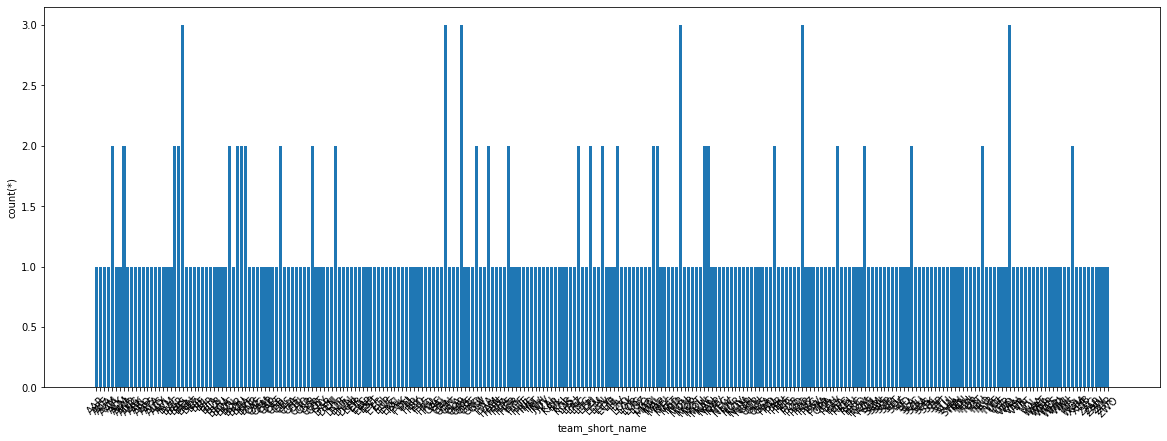

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))

plot = %sql SELECT team_short_name, count(*) FROM Team GROUP BY team_short_name ORDER BY team_short_name
plot.bar();

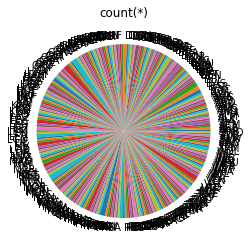

In [54]:
plot.pie();

In [55]:
type(plot)

sql.run.ResultSet